In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
from fuzzywuzzy import process
import numpy as np
np.set_printoptions(suppress=True)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
import sys
!{sys.executable} -m pip install fuzzywuzzy python-Levenshtein

In [3]:
df = pd.read_csv("cleaned_bank_data.csv")
df

,Customer_ID,Customer_Name,Age,Gender,Occupation,Annual_Income,City,State,Loan_Type,Loan_Amount,...,Bank_Branch,Account_Balance,Interest_Rate,Loan_Repayment_Status,Disbursed_Amount,Branch_Manager,Income_Status,AgeGroup,interestlevel,creditlevel
0,CUST00001,Ivan aWrrior,35,Other,Self-employed,904251,GIRIDIH,Karnataka,Home Loan,4292053,...,Bangalore branch,330987,12.53,Completed,4292053,Ayesha Bhattacharyya,high,mid-age,medium_interest,high_credit
1,CUST00002,shamik bhardwaj,70,Female,Salaried,2176409,Delhi,Karnataka,Education Loan,739452,...,Mumbai Branch,111656,12.37,Pending,739452,Adah Sha,verhigh,old-age,medium_interest,high_credit
2,CUST00003,uPrab Samra,36,Male,Student,418339,Raichur,Maharashtra,Car Loan,802308,...,Bangalore branch,282128,12.62,Completed,802308,Indrajit Batra,median,mid-age,medium_interest,low_credit
3,CUST00004,Samar Balay,42,Female,Self-employed,1249905,TIRUPPUR,Karnataka,Gold Loan,234488,...,Delhi Branch,19956,12.15,Pending,234488,Jayan Kuruvilla,high,mid-age,medium_interest,low_credit
4,CUST00005,Madhup Walla,53,Other,Unemployed,1081891,Hazaribagh,West Bengal,Education Loan,509615,...,Mumbai Branch,124663,8.52,Pending,509615,Dhanush Raju,high,adult,low_interest,medium_credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230479,CUST230480,Indrajti Acharya,68,Male,Salaried,2141385,Bhopal,Tamil Nadu,Car Loan,1023340,...,Bangalore branch,154080,12.97,Pending,1023340,Ana yShah,verhigh,old-age,medium_interest,high_credit
230480,CUST230481,Onkar Vala,59,Female,Retired,1619705,Mysore,Tamil Nadu,Personal Loan,636396,...,Kolkata Branch,480904,14.85,Pending,636396,Hee rBadal,verhigh,adult,high_interest,low_credit
230481,CUST230482,Kanav Sahni,28,Female,Salaried,2207685,Dugr,Maharashtra,Personal Loan,540131,...,Delhi Branch,116009,9.60,Completed,540131,Hridaan Ganesh,verhigh,young,low_interest,medium_credit
230482,CUST230483,Manikya Handa,62,Other,Salaried,1593678,Dindiugl,Karnataka,Home Loan,3241096,...,Mumbai Branch,249823,14.40,Completed,3241096,Tejas Dayal,verhigh,old-age,high_interest,low_credit


In [4]:
df.columns

Index(['Customer_ID', 'Customer_Name', 'Age', 'Gender', 'Occupation',
       'Annual_Income', 'City', 'State', 'Loan_Type', 'Loan_Amount',
       'Loan_Status', 'Credit_Score', 'EMI_Amount', 'Loan_Term',
       'Loan_Approval_Date', 'Mobile_Number', 'Bank_Branch', 'Account_Balance',
       'Interest_Rate', 'Loan_Repayment_Status', 'Disbursed_Amount',
       'Branch_Manager', 'Income_Status', 'AgeGroup', 'interestlevel',
       'creditlevel'],
      dtype='object')

In [5]:
# 1.Age, Income & Loan_Amount combined?

In [6]:
data = df[['AgeGroup','Income_Status','Loan_Amount']]
data

,AgeGroup,Income_Status,Loan_Amount
0,mid-age,high,4292053
1,old-age,verhigh,739452
2,mid-age,median,802308
3,mid-age,high,234488
4,adult,high,509615
...,...,...,...
230479,old-age,verhigh,1023340
230480,adult,verhigh,636396
230481,young,verhigh,540131
230482,old-age,verhigh,3241096


In [7]:
vary = data.groupby(
    ['AgeGroup','Income_Status'])['Loan_Amount'].describe()
vary

count         mean          std       min  \
AgeGroup Income_Status                                                 
adult    high          16,980.00 1,105,743.68 1,085,852.43 50,394.00   
         low            5,593.00 1,134,751.35 1,114,506.41 50,711.00   
         median        11,512.00 1,102,999.09 1,086,229.38 50,048.00   
         verhigh       31,218.00 1,093,770.44 1,073,854.40 50,175.00   
mid-age  high          16,996.00 1,097,391.43 1,075,954.71 50,109.00   
         low            5,762.00 1,091,684.28 1,078,239.74 52,266.00   
         median        11,431.00 1,093,316.17 1,088,179.37 50,139.00   
         verhigh       31,027.00 1,095,880.01 1,075,352.30 50,254.00   
old-age  high          12,532.00 1,105,460.03 1,095,698.07 50,725.00   
         low            4,234.00 1,076,398.77 1,061,261.33 52,637.00   
         median         8,266.00 1,104,660.03 1,090,804.18 50,697.00   
         verhigh       22,838.00 1,101,431.35 1,082,012.84 50,010.00   
young    high          13,509.00 1,076,285.34 1,056,469.10 50,549.00   
         low            4,427.00 1,115,227.99 1,093,147.20 51,321.00   
         median         9,176.00 1,089,476.36 1,059,431.91 50,209.00   
         verhigh       24,983.00 1,099,206.86 1,079,695.91 50,133.00   

                              25%        50%          75%          max  
AgeGroup Income_Status                                                  
adult    high          429,015.00 743,985.00 1,302,412.75 4,999,858.00  
         low           441,417.00 756,889.00 1,330,618.00 4,990,975.00  
         median        429,141.25 744,206.00 1,263,094.50 4,997,896.00  
         verhigh       430,401.00 739,924.00 1,259,641.50 4,999,446.00  
mid-age  high          429,770.50 746,430.00 1,257,603.00 4,999,338.00  
         low           428,352.00 740,557.00 1,244,716.75 4,999,591.00  
         median        417,604.00 728,523.00 1,236,018.50 4,999,908.00  
         verhigh       429,233.50 742,992.00 1,255,300.50 4,999,763.00  
old-age  high          426,916.00 740,216.00 1,262,654.25 4,999,287.00  
         low           436,290.25 730,474.50 1,210,424.00 4,996,177.00  
         median        434,567.75 744,010.50 1,246,277.00 4,999,960.00  
         verhigh       429,759.75 745,024.00 1,269,047.00 4,999,116.00  
young    high          419,970.00 731,911.00 1,206,031.00 4,998,514.00  
         low           444,891.00 747,443.00 1,307,290.50 4,996,455.00  
         median        429,616.25 746,767.50 1,266,470.00 4,996,176.00  
         verhigh       435,078.50 740,418.00 1,250,087.50 4,999,536.00

In [8]:
summary = (
    df.groupby("AgeGroup")[["Annual_Income", "Loan_Amount"]]
      .mean()
      .reset_index()
      .sort_values(by="Annual_Income")
)

print(summary)

  AgeGroup  Annual_Income  Loan_Amount
1  mid-age   1,346,458.88 1,095,453.81
0    adult   1,349,136.59 1,102,020.48
2  old-age   1,349,208.70 1,100,829.46
3    young   1,351,203.54 1,092,910.51


<Axes: xlabel='AgeGroup', ylabel='Loan_Amount'>

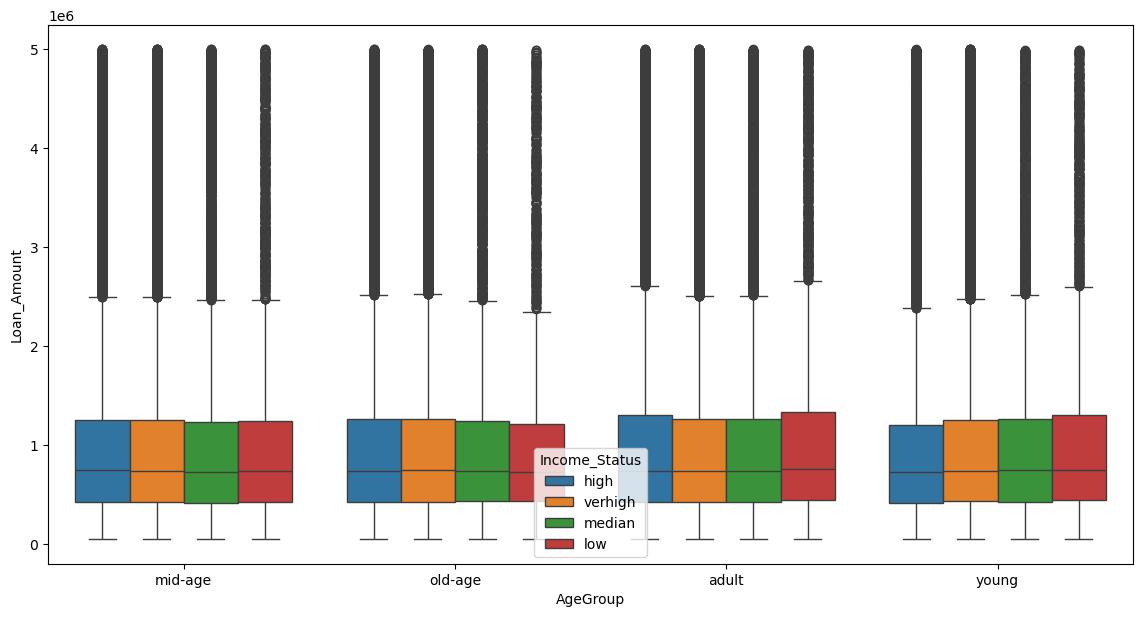

In [9]:
plt.figure(figsize=(14,7))
sns.boxplot(
    data=data,
    x='AgeGroup',
    y='Loan_Amount',
    hue='Income_Status'
)

C:\Users\there\AppData\Local\Temp\ipykernel_6784\4103573643.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Loan_Amount_Capped'] = np.where(data['Loan_Amount'] > upper_limit, upper_limit,


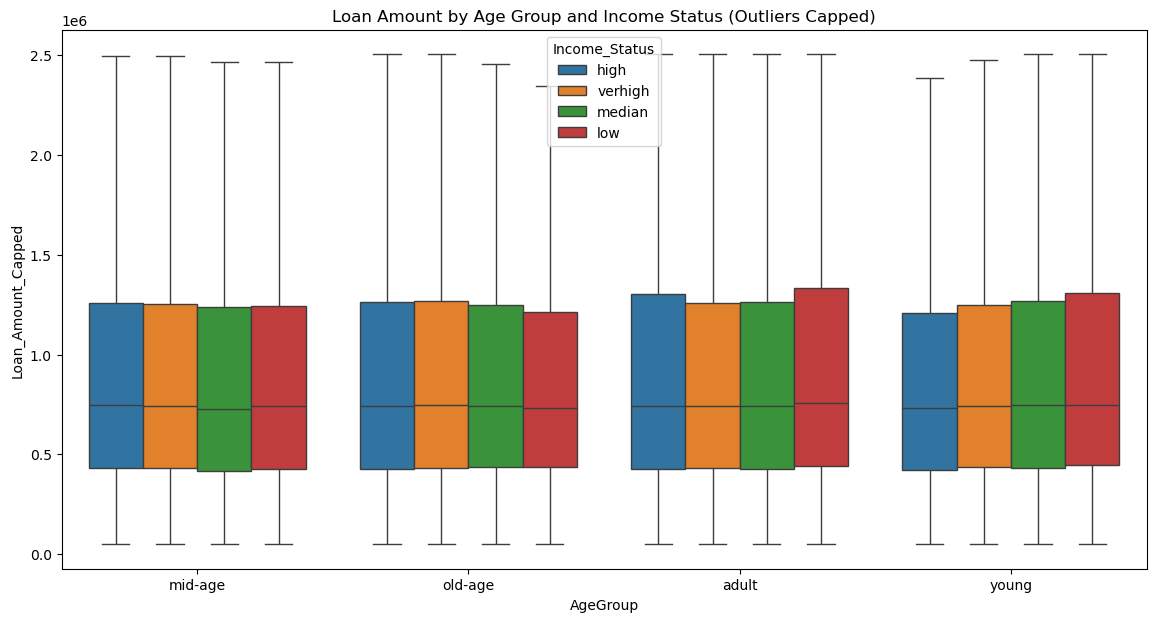

In [10]:
Q1 = data['Loan_Amount'].quantile(0.25)
Q3 = data['Loan_Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Cap the outliers
data['Loan_Amount_Capped'] = np.where(data['Loan_Amount'] > upper_limit, upper_limit,
                               np.where(data['Loan_Amount'] < lower_limit, lower_limit, data['Loan_Amount']))

plt.figure(figsize=(14,7))
sns.boxplot(
    data=data,
    x='AgeGroup',
    y='Loan_Amount_Capped',
    hue='Income_Status',
    showfliers=False
)
plt.title('Loan Amount by Age Group and Income Status (Outliers Capped)')
plt.show()


C:\Users\there\AppData\Local\Temp\ipykernel_6784\725928362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Loan_Amount_Log'] = np.log1p(data['Loan_Amount'])


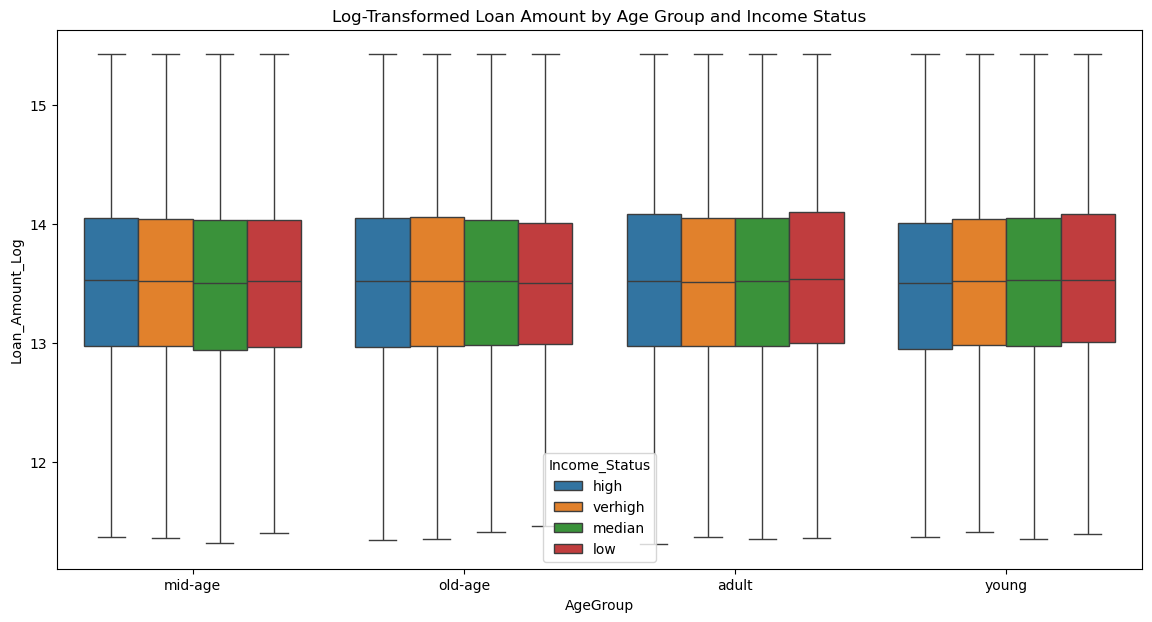

In [11]:
data['Loan_Amount_Log'] = np.log1p(data['Loan_Amount'])

plt.figure(figsize=(14,7))
sns.boxplot(
    data=data,
    x='AgeGroup',
    y='Loan_Amount_Log',
    hue='Income_Status',
    showfliers=False
)
plt.title('Log-Transformed Loan Amount by Age Group and Income Status')
plt.show()

In [12]:
# 2.Occupation, City & Loan_Status

In [13]:
data = df[['Occupation','State','Loan_Status']]
data

,Occupation,State,Loan_Status
0,Self-employed,Karnataka,Default
1,Salaried,Karnataka,Default
2,Student,Maharashtra,Closed
3,Self-employed,Karnataka,Active
4,Unemployed,West Bengal,Default
...,...,...,...
230479,Salaried,Tamil Nadu,Active
230480,Retired,Tamil Nadu,Closed
230481,Salaried,Maharashtra,Active
230482,Salaried,Karnataka,Default


In [14]:
vary = data.groupby(
    ['Occupation','State','Loan_Status']
).size().reset_index(name='count')
vary

,Occupation,State,Loan_Status,count
0,Retired,Andhra Pradesh,Active,1898
1,Retired,Andhra Pradesh,Closed,1983
2,Retired,Andhra Pradesh,Default,1975
3,Retired,Delhi,Active,1890
4,Retired,Delhi,Closed,1933
...,...,...,...,...
115,Unemployed,Uttar Pradesh,Closed,1921
116,Unemployed,Uttar Pradesh,Default,1841
117,Unemployed,West Bengal,Active,1924
118,Unemployed,West Bengal,Closed,1941


In [15]:
pivot = vary.pivot_table(
    index=['Loan_Status','Occupation'],
    columns='State',
    values='count'
)
print(pivot)

State                      Andhra Pradesh    Delhi  Karnataka  Maharashtra  \
Loan_Status Occupation                                                       
Active      Retired              1,898.00 1,890.00   1,913.00     1,943.00   
            Salaried             1,888.00 1,955.00   1,883.00     1,941.00   
            Self-employed        1,980.00 1,898.00   1,979.00     1,891.00   
            Student              1,911.00 1,945.00   1,929.00     1,998.00   
            Unemployed           1,900.00 1,908.00   1,938.00     1,874.00   
Closed      Retired              1,983.00 1,933.00   1,911.00     1,908.00   
            Salaried             1,922.00 1,868.00   2,018.00     1,947.00   
            Self-employed        1,950.00 1,937.00   1,917.00     1,902.00   
            Student              1,948.00 1,901.00   1,970.00     1,951.00   
            Unemployed           1,951.00 1,981.00   1,903.00     1,948.00   
Default     Retired              1,975.00 2,016.00   1,881.00   

Text(0.5, 1.0, 'Occupation, City & Loan_Status')

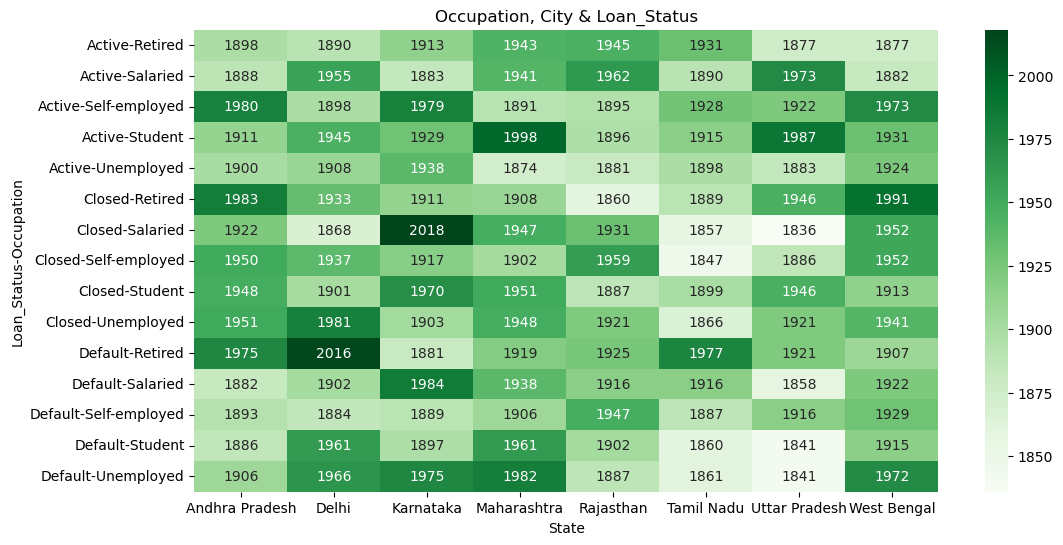

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(
    pivot,
    annot=True,cmap='Greens',fmt='.0f'
)
plt.title('Occupation, City & Loan_Status')

In [17]:
# 3.Credit_Score, Annual Income & Repayment_Status

In [18]:
# Check column statistics and unique values
print(df[["Credit_Score", "Income_Status", "Loan_Repayment_Status"]].info())
print(df["Loan_Repayment_Status"].value_counts())
print(df[["Credit_Score", "Annual_Income"]].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230484 entries, 0 to 230483
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Credit_Score           230484 non-null  int64 
 1   Income_Status          230484 non-null  object
 2   Loan_Repayment_Status  230484 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB
None
Loan_Repayment_Status
Completed    77227
Pending      76641
Deferred     76616
Name: count, dtype: int64
       Credit_Score  Annual_Income
count    230,484.00     230,484.00
mean         575.14   1,348,861.08
std          158.92     664,284.38
min          300.00     200,004.00
25%          438.00     772,936.00
50%          575.00   1,346,870.50
75%          713.00   1,924,250.00
max          850.00   2,499,999.00


<Axes: xlabel='Loan_Repayment_Status', ylabel='Credit_Score'>

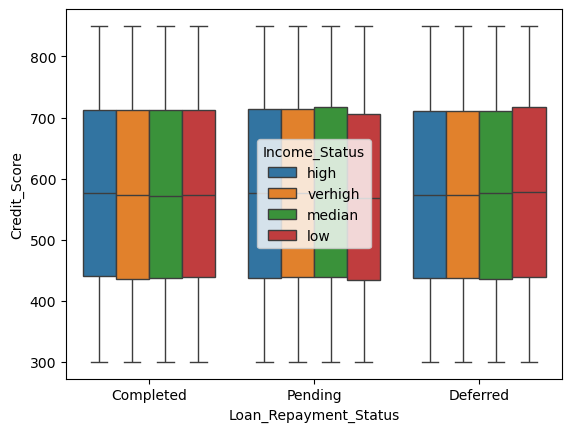

In [19]:
sns.boxplot(
    data=df,
    x='Loan_Repayment_Status',
    y='Credit_Score',
    hue='Income_Status'
)


In [20]:
summary = (
    df.groupby("Loan_Repayment_Status")[["Credit_Score", "Interest_Rate"]]
    .mean()
    .reset_index()
    .sort_values(by="Credit_Score", ascending=False)
)

print(summary)


  Loan_Repayment_Status  Credit_Score  Interest_Rate
2               Pending        575.78          11.49
0             Completed        574.92          11.49
1              Deferred        574.71          11.50


In [21]:
# 4.Which State and Bank Branch combinations have the highest interest rate?

In [22]:
# Keep relevant columns
analysis_df5 = df.dropna(subset=['State','Bank_Branch','Interest_Rate'])

# Quick look
analysis_df5[['State','Bank_Branch','Interest_Rate']]

,State,Bank_Branch,Interest_Rate
0,Karnataka,Bangalore branch,12.53
1,Karnataka,Mumbai Branch,12.37
2,Maharashtra,Bangalore branch,12.62
3,Karnataka,Delhi Branch,12.15
4,West Bengal,Mumbai Branch,8.52
...,...,...,...
230479,Tamil Nadu,Bangalore branch,12.97
230480,Tamil Nadu,Kolkata Branch,14.85
230481,Maharashtra,Delhi Branch,9.60
230482,Karnataka,Mumbai Branch,14.40


In [23]:
# Group by State and Bank Branch, and calculate the mean interest rate
state_branch_interest = (
    df.groupby(["State", "Bank_Branch"])["Interest_Rate"]
    .mean()
    .reset_index()
    .sort_values(by="Interest_Rate", ascending=False)
)

# Display top 10 combinations with highest average interest rate
print(state_branch_interest.head(10))


             State       Bank_Branch  Interest_Rate
20      Tamil Nadu  Bangalore branch          11.54
24   Uttar Pradesh  Bangalore branch          11.53
29     West Bengal      Delhi Branch          11.53
8        Karnataka  Bangalore branch          11.53
28     West Bengal  Bangalore branch          11.51
19       Rajasthan     Mumbai Branch          11.51
6            Delhi    Kolkata Branch          11.51
3   Andhra Pradesh     Mumbai Branch          11.51
12     Maharashtra  Bangalore branch          11.51
25   Uttar Pradesh      Delhi Branch          11.50


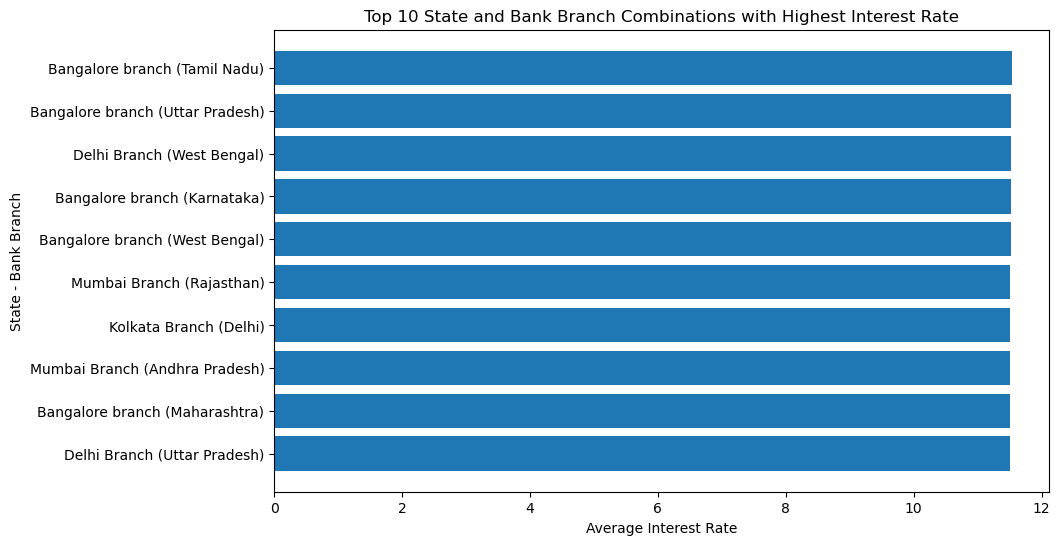

In [24]:
import matplotlib.pyplot as plt

# Plot top 10 combinations
top10 = state_branch_interest.head(10)
plt.figure(figsize=(10,6))
plt.barh(top10["Bank_Branch"] + " (" + top10["State"] + ")", top10["Interest_Rate"])
plt.xlabel("Average Interest Rate")
plt.ylabel("State - Bank Branch")
plt.title("Top 10 State and Bank Branch Combinations with Highest Interest Rate")
plt.gca().invert_yaxis()
plt.show()


In [25]:
# 5.Which State and Bank Branch combinations have the best Loan Approval Rate?

In [26]:
# Define which statuses count as approved
approved_status = ["Closed", "Active"]

# Calculate approval rate
approval_rate = (
    df.groupby(["State", "Bank_Branch"])["Loan_Status"]
      .apply(lambda x: x.isin(approved_status).mean() * 100)
      .reset_index(name="Approval Rate (%)")
      .sort_values(by="Approval Rate (%)", ascending=False)
)

print(approval_rate.head(10))


             State       Bank_Branch  Approval Rate (%)
25   Uttar Pradesh      Delhi Branch              67.64
15     Maharashtra     Mumbai Branch              67.42
3   Andhra Pradesh     Mumbai Branch              67.37
27   Uttar Pradesh     Mumbai Branch              67.31
2   Andhra Pradesh    Kolkata Branch              67.27
17       Rajasthan      Delhi Branch              67.14
18       Rajasthan    Kolkata Branch              67.02
26   Uttar Pradesh    Kolkata Branch              66.99
28     West Bengal  Bangalore branch              66.98
30     West Bengal    Kolkata Branch              66.97


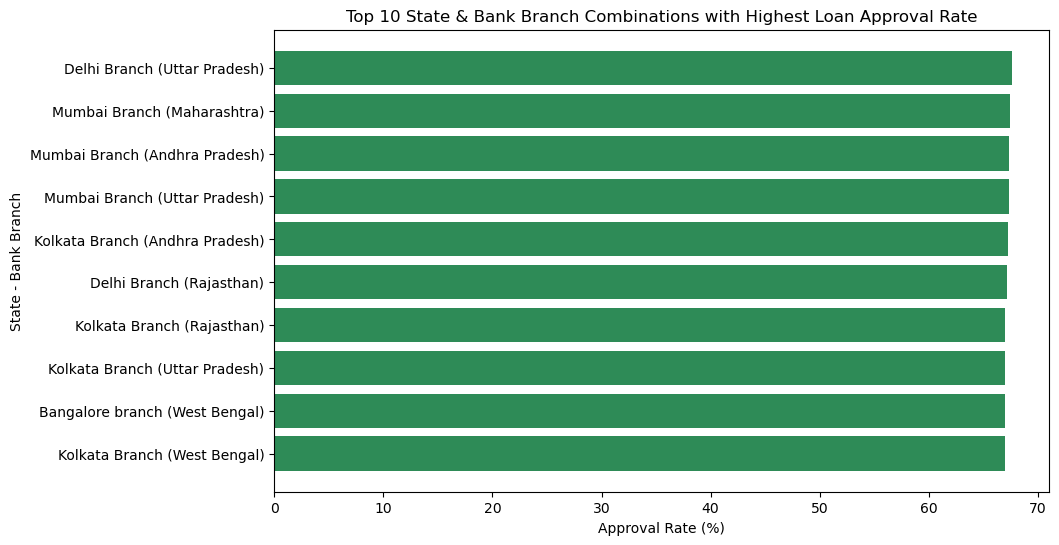

In [27]:
import matplotlib.pyplot as plt

top10 = approval_rate.head(10)
plt.figure(figsize=(10,6))
plt.barh(top10["Bank_Branch"] + " (" + top10["State"] + ")", top10["Approval Rate (%)"], color='seagreen')
plt.xlabel("Approval Rate (%)")
plt.ylabel("State - Bank Branch")
plt.title("Top 10 State & Bank Branch Combinations with Highest Loan Approval Rate")
plt.gca().invert_yaxis()
plt.show()


In [28]:
# 6.How do Occupation and State influence the Type of Loan chosen?

In [29]:
influence = pd.crosstab(
    index=[df['Occupation'], df['State']], 
    columns=df['Loan_Type']
)
influence

Loan_Type                     Car Loan  Education Loan  Gold Loan  Home Loan  \
Occupation    State                                                            
Retired       Andhra Pradesh      1174            1167       1138       1183   
              Delhi               1172            1150       1213       1152   
              Karnataka           1164            1155       1087       1169   
              Maharashtra         1128            1197       1126       1167   
              Rajasthan           1130            1184       1135       1132   
              Tamil Nadu          1142            1173       1151       1162   
              Uttar Pradesh       1185            1074       1149       1159   
              West Bengal         1173            1146       1160       1132   
Salaried      Andhra Pradesh      1096            1111       1184       1180   
              Delhi               1101            1095       1164       1178   
              Karnataka           1196            1186       1136       1167   
              Maharashtra         1206            1169       1110       1199   
              Rajasthan           1196            1138       1161       1177   
              Tamil Nadu          1140            1123       1125       1142   
              Uttar Pradesh       1147            1102       1113       1155   
              West Bengal         1132            1145       1128       1173   
Self-employed Andhra Pradesh      1162            1130       1188       1178   
              Delhi               1100            1206       1135       1125   
              Karnataka           1166            1156       1181       1116   
              Maharashtra         1159            1134       1158       1144   
              Rajasthan           1199            1154       1126       1183   
              Tamil Nadu          1178            1115       1089       1108   
              Uttar Pradesh       1135            1162       1176       1129   
              West Bengal         1190            1218       1157       1178   
Student       Andhra Pradesh      1143            1143       1155       1171   
              Delhi               1133            1187       1197       1153   
              Karnataka           1144            1139       1152       1155   
              Maharashtra         1183            1193       1202       1189   
              Rajasthan           1172            1109       1105       1166   
              Tamil Nadu          1205            1122       1114       1161   
              Uttar Pradesh       1111            1117       1166       1210   
              West Bengal         1189            1132       1154       1161   
Unemployed    Andhra Pradesh      1170            1163       1095       1172   
              Delhi               1196            1181       1220       1146   
              Karnataka           1199            1213       1094       1170   
              Maharashtra         1190            1187       1218       1114   
              Rajasthan           1129            1092       1169       1173   
              Tamil Nadu          1144            1117       1134       1138   
              Uttar Pradesh       1150            1111       1150       1137   
              West Bengal         1135            1192       1169       1157   

Loan_Type                     Personal Loan  
Occupation    State                          
Retired       Andhra Pradesh           1194  
              Delhi                    1152  
              Karnataka                1130  
              Maharashtra              1152  
              Rajasthan                1149  
              Tamil Nadu               1169  
              Uttar Pradesh            1177  
              West Bengal              1164  
Salaried      Andhra Pradesh           1121  
              Delhi                    1187  
              Karnataka                1200  
              Maharashtra              11

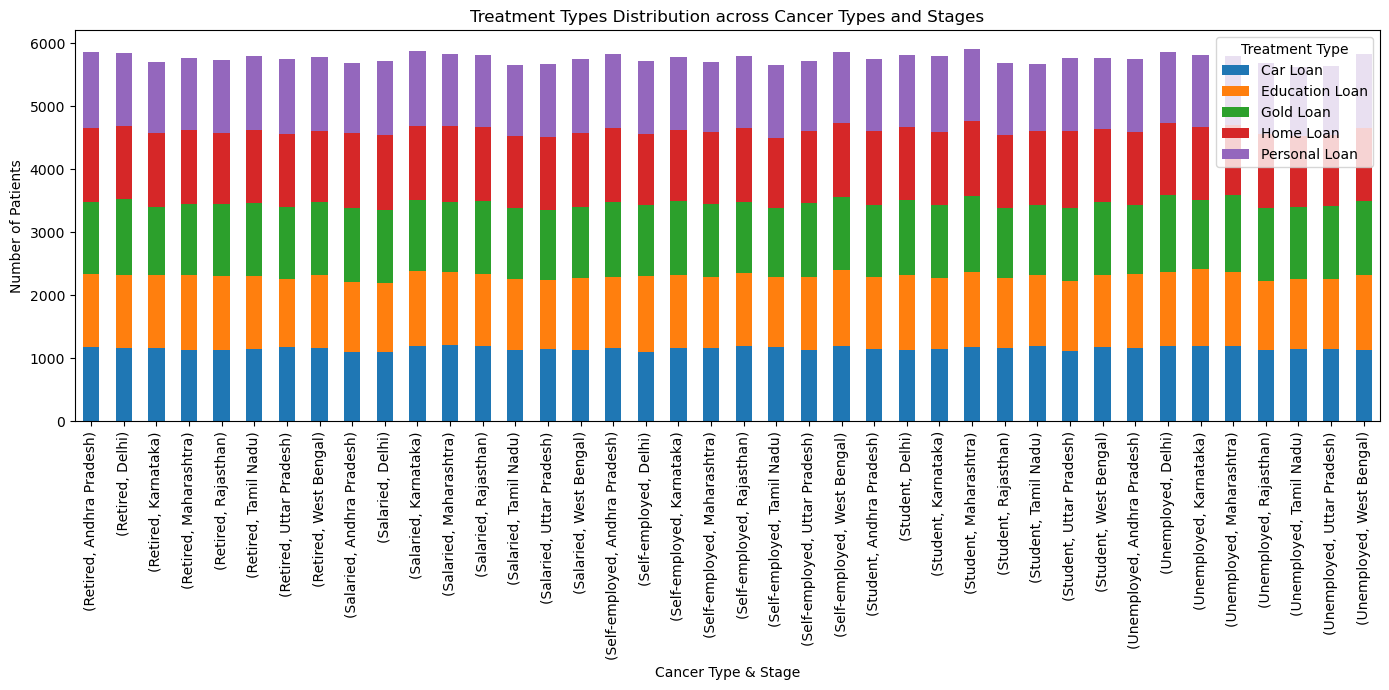

In [30]:
influence.plot(kind="bar", stacked=True, figsize=(14, 7))

plt.title("Treatment Types Distribution across Cancer Types and Stages")
plt.xlabel("Cancer Type & Stage")
plt.ylabel("Number of Patients")
plt.xticks(rotation=90)
plt.legend(title="Treatment Type")
plt.tight_layout()
plt.show()


In [33]:
# 7.Which State, City, and Bank Branch combination has the maximum number of customers?”

In [34]:

customer_count = (
    df.groupby(["Loan_Type" ,"Occupation"])["Customer_ID"]
      .count()
      .reset_index(name="Customer_Count")
      .sort_values(by="Customer_Count", ascending=False)
)

# Display top 10 combinations
print(customer_count.head(10))


         Loan_Type     Occupation  Customer_Count
16       Home Loan       Salaried            9371
18       Home Loan        Student            9366
4         Car Loan     Unemployed            9313
2         Car Loan  Self-employed            9289
20   Personal Loan        Retired            9287
3         Car Loan        Student            9280
7   Education Loan  Self-employed            9275
0         Car Loan        Retired            9268
15       Home Loan        Retired            9256
9   Education Loan     Unemployed            9256


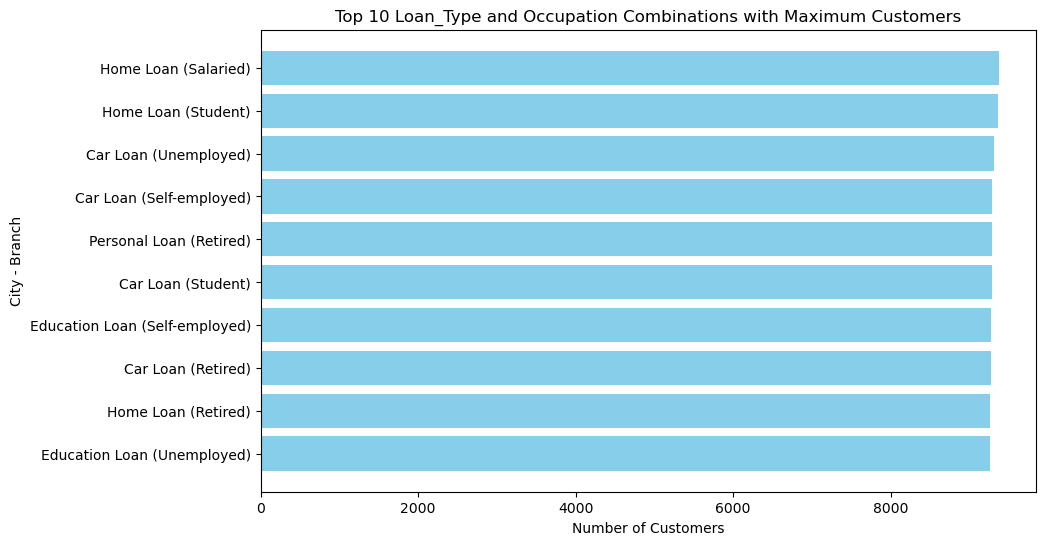

In [35]:
###### import matplotlib.pyplot as plt

top10 = customer_count.head(10)
plt.figure(figsize=(10,6))
plt.barh(top10["Loan_Type"] + " (" + top10["Occupation"] + ")", top10["Customer_Count"], color="skyblue")
plt.xlabel("Number of Customers")
plt.ylabel("City - Branch")
plt.title("Top 10 Loan_Type and Occupation Combinations with Maximum Customers")
plt.gca().invert_yaxis()
plt.show()

In [36]:
state_summary = (
    df.groupby("State")["Customer_ID"]
      .count()
      .reset_index(name="Total_Customers")
      .sort_values(by="Total_Customers", ascending=False)
)

print(state_summary.head(5))


            State  Total_Customers
3     Maharashtra            29009
2       Karnataka            28987
7     West Bengal            28981
1           Delhi            28945
0  Andhra Pradesh            28873


In [38]:
# 8.Which combination of State, Loan Type, and Branch has the highest Loan Disbursement?

In [39]:


# Group by State, Loan Type, and Branch
loan_disbursement = (
    df.groupby(["State", "Loan_Type", "Bank_Branch"])["Loan_Amount"]
      .sum()
      .reset_index(name="Total_Loan_Disbursement")
      .sort_values(by="Total_Loan_Disbursement", ascending=False)
)

# Display top 10 combinations
print(loan_disbursement.head(10))


              State  Loan_Type       Bank_Branch  Total_Loan_Disbursement
153     West Bengal  Home Loan      Delhi Branch               4306993744
12   Andhra Pradesh  Home Loan  Bangalore branch               4060544822
33            Delhi  Home Loan      Delhi Branch               4058754868
94        Rajasthan  Home Loan    Kolkata Branch               4048768071
132   Uttar Pradesh  Home Loan  Bangalore branch               4043685690
73      Maharashtra  Home Loan      Delhi Branch               4041790568
32            Delhi  Home Loan  Bangalore branch               4024732785
95        Rajasthan  Home Loan     Mumbai Branch               4020451444
75      Maharashtra  Home Loan     Mumbai Branch               4011205624
134   Uttar Pradesh  Home Loan    Kolkata Branch               4007842685


In [40]:
top_combination = loan_disbursement.iloc[0]
print("State:", top_combination["State"])
print("Loan Type:", top_combination["Loan_Type"])
print("Branch:", top_combination["Bank_Branch"])
print("Total Loan Disbursement:", round(top_combination["Total_Loan_Disbursement"], 2))


State: West Bengal
Loan Type: Home Loan
Branch: Delhi Branch
Total Loan Disbursement: 4306993744


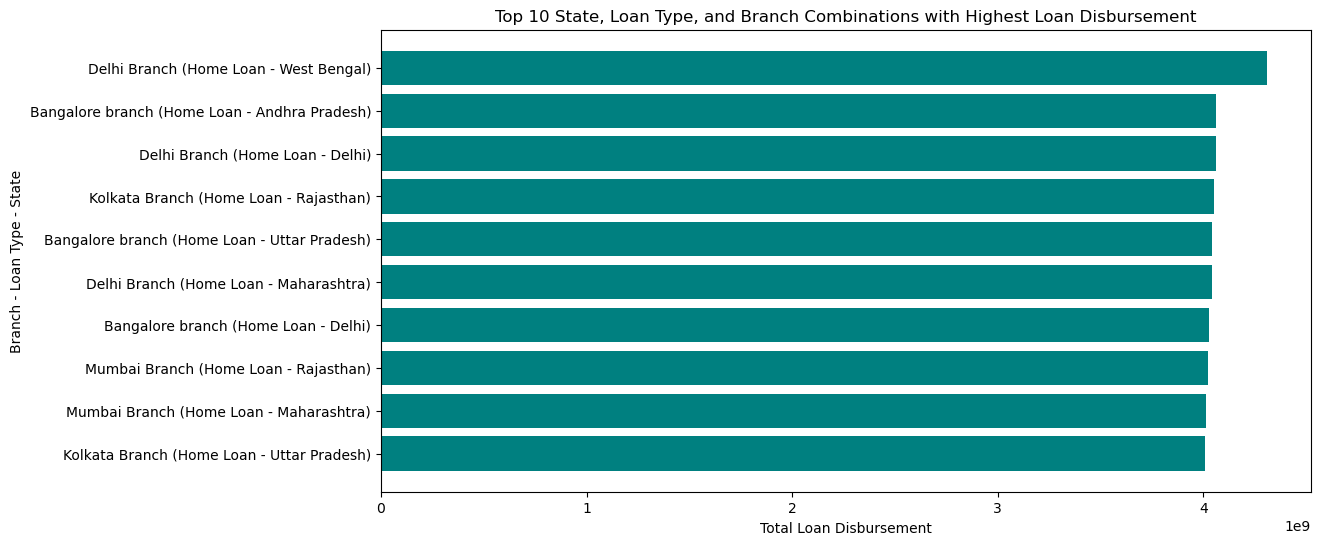

In [41]:
import matplotlib.pyplot as plt

top10 = loan_disbursement.head(10)

plt.figure(figsize=(12,6))
plt.barh(top10["Bank_Branch"] + " (" + top10["Loan_Type"] + " - " + top10["State"] + ")", 
         top10["Total_Loan_Disbursement"], color='teal')
plt.xlabel("Total Loan Disbursement")
plt.ylabel("Branch - Loan Type - State")
plt.title("Top 10 State, Loan Type, and Branch Combinations with Highest Loan Disbursement")
plt.gca().invert_yaxis()
plt.show()


In [42]:
state_summary = (
    df.groupby("State")["Loan_Amount"]
      .sum()
      .reset_index(name="Total_Loan_Disbursement")
      .sort_values(by="Total_Loan_Disbursement", ascending=False)
)

print(state_summary.head(5))


            State  Total_Loan_Disbursement
7     West Bengal              32008691774
3     Maharashtra              31785355108
0  Andhra Pradesh              31717666347
2       Karnataka              31698091687
4       Rajasthan              31690721333


In [43]:
# 9.How do Gender and Occupation together affect Loan Status?

In [44]:
data = df[['Occupation','Gender','Loan_Status']]
data

,Occupation,Gender,Loan_Status
0,Self-employed,Other,Default
1,Salaried,Female,Default
2,Student,Male,Closed
3,Self-employed,Female,Active
4,Unemployed,Other,Default
...,...,...,...
230479,Salaried,Male,Active
230480,Retired,Female,Closed
230481,Salaried,Female,Active
230482,Salaried,Other,Default


In [45]:
vary = data.groupby(
    ['Occupation','Gender','Loan_Status']
).size().reset_index(name='count')
vary

,Occupation,Gender,Loan_Status,count
0,Retired,Female,Active,5075
1,Retired,Female,Closed,5082
2,Retired,Female,Default,5229
3,Retired,Male,Active,5103
4,Retired,Male,Closed,5258
5,Retired,Male,Default,5134
6,Retired,Other,Active,5096
7,Retired,Other,Closed,5081
8,Retired,Other,Default,5158
9,Salaried,Female,Active,5131


In [46]:
pivot = vary.pivot_table(
    index=['Loan_Status','Gender'],
    columns='Occupation',
    values='count'
)
print(pivot)

Occupation          Retired  Salaried  Self-employed  Student  Unemployed
Loan_Status Gender                                                       
Active      Female 5,075.00  5,131.00       5,120.00 5,113.00    4,939.00
            Male   5,103.00  5,066.00       5,191.00 5,222.00    5,113.00
            Other  5,096.00  5,177.00       5,155.00 5,177.00    5,154.00
Closed      Female 5,082.00  5,111.00       5,141.00 5,211.00    5,123.00
            Male   5,258.00  5,147.00       5,142.00 5,076.00    5,193.00
            Other  5,081.00  5,073.00       5,067.00 5,128.00    5,116.00
Default     Female 5,229.00  5,145.00       5,083.00 5,116.00    5,125.00
            Male   5,134.00  5,090.00       5,099.00 5,157.00    5,155.00
            Other  5,158.00  5,083.00       5,069.00 4,950.00    5,110.00


Text(0.5, 1.0, 'Occupation, Gender & Loan_Status')

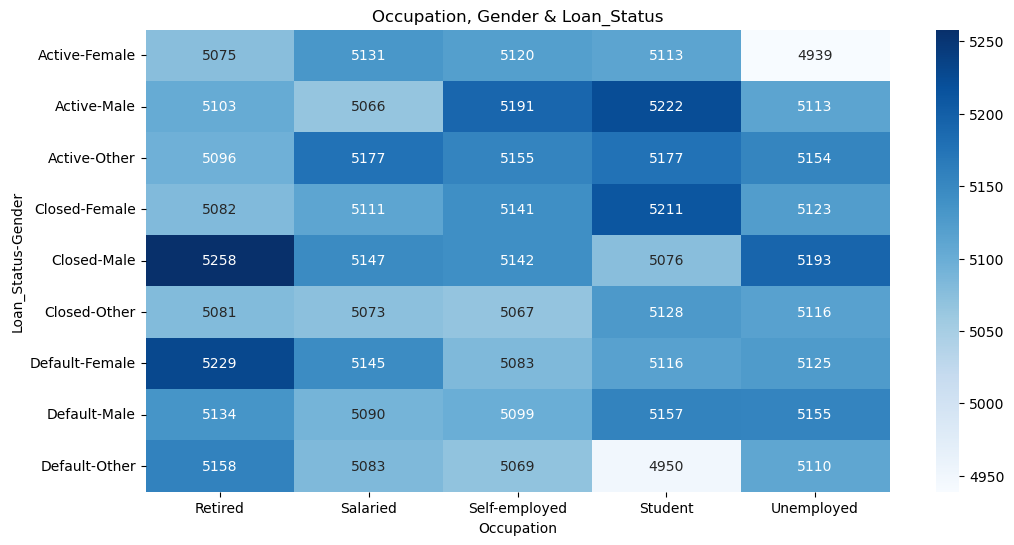

In [47]:
plt.figure(figsize=(12,6))
sns.heatmap(
    pivot,
    annot=True,cmap='Blues',fmt='.0f'
)
plt.title('Occupation, Gender & Loan_Status')

In [48]:
crosstab = pd.crosstab(
    [data['Gender'], data['Loan_Status']], 
    data['Occupation'],
) 

print(crosstab)

Occupation          Retired  Salaried  Self-employed  Student  Unemployed
Gender Loan_Status                                                       
Female Active          5075      5131           5120     5113        4939
       Closed          5082      5111           5141     5211        5123
       Default         5229      5145           5083     5116        5125
Male   Active          5103      5066           5191     5222        5113
       Closed          5258      5147           5142     5076        5193
       Default         5134      5090           5099     5157        5155
Other  Active          5096      5177           5155     5177        5154
       Closed          5081      5073           5067     5128        5116
       Default         5158      5083           5069     4950        5110


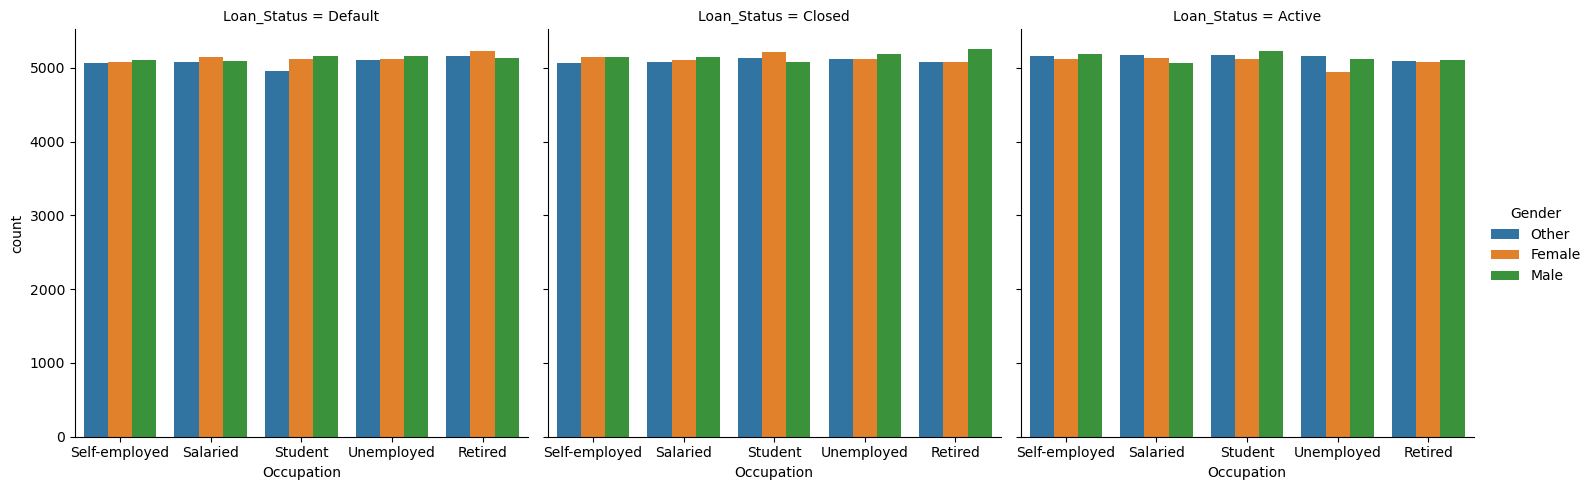

In [49]:
sns.catplot(
    data=data,
    x="Occupation",
    hue="Gender",
    col="Loan_Status",
    kind="count",
)

In [50]:
# 10.How do Loan Term, EMI Amount, and Loan Amount relate to each other?

In [51]:
data = df[['Loan_Term','EMI_Amount','Loan_Amount']]
data

,Loan_Term,EMI_Amount,Loan_Amount
0,360,"45,912.85",4292053
1,84,"13,198.19",739452
2,72,"15,944.93",802308
3,36,"7,805.61",234488
4,84,"8,074.51",509615
...,...,...,...
230479,36,"34,466.38",1023340
230480,12,"57,395.34",636396
230481,12,"47,386.59",540131
230482,360,"39,428.14",3241096


In [52]:
df.columns

Index(['Customer_ID', 'Customer_Name', 'Age', 'Gender', 'Occupation',
       'Annual_Income', 'City', 'State', 'Loan_Type', 'Loan_Amount',
       'Loan_Status', 'Credit_Score', 'EMI_Amount', 'Loan_Term',
       'Loan_Approval_Date', 'Mobile_Number', 'Bank_Branch', 'Account_Balance',
       'Interest_Rate', 'Loan_Repayment_Status', 'Disbursed_Amount',
       'Branch_Manager', 'Income_Status', 'AgeGroup', 'interestlevel',
       'creditlevel'],
      dtype='object')

In [53]:
# 11.How do Age, Gender, and Loan Type impact Loan Status?

In [54]:
vary = df.groupby(
    ['AgeGroup','Gender','Loan_Status']
).size().reset_index(name='count')
vary

,AgeGroup,Gender,Loan_Status,count
0,adult,Female,Active,7177
1,adult,Female,Closed,7384
2,adult,Female,Default,7258
3,adult,Male,Active,7304
4,adult,Male,Closed,7331
5,adult,Male,Default,7168
6,adult,Other,Active,7302
7,adult,Other,Closed,7249
8,adult,Other,Default,7130
9,mid-age,Female,Active,7165


In [55]:
pivot = vary.pivot_table(
    index=['Loan_Status','Gender'],
    columns='AgeGroup',
    values='count'
)
print(pivot)

AgeGroup              adult  mid-age  old-age    young
Loan_Status Gender                                    
Active      Female 7,177.00 7,165.00 5,211.00 5,825.00
            Male   7,304.00 7,342.00 5,307.00 5,742.00
            Other  7,302.00 7,242.00 5,407.00 5,808.00
Closed      Female 7,384.00 7,178.00 5,273.00 5,833.00
            Male   7,331.00 7,273.00 5,372.00 5,840.00
            Other  7,249.00 7,261.00 5,244.00 5,711.00
Default     Female 7,258.00 7,246.00 5,355.00 5,839.00
            Male   7,168.00 7,275.00 5,398.00 5,794.00
            Other  7,130.00 7,234.00 5,303.00 5,703.00


Text(0.5, 1.0, 'AgeGroup, Gender & Loan_Status')

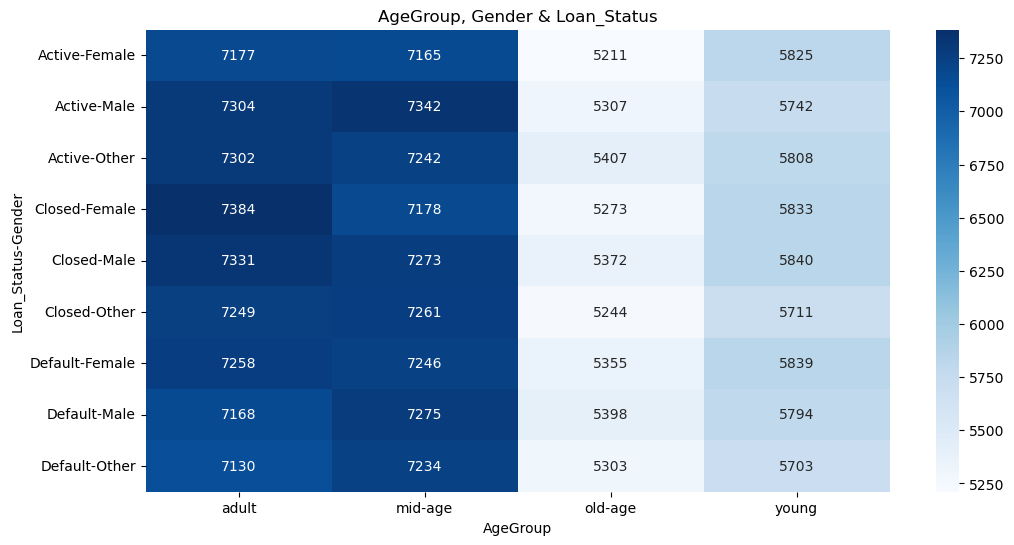

In [56]:
plt.figure(figsize=(12,6))
sns.heatmap(
    pivot,
    annot=True,cmap='Blues',fmt='.0f'
)
plt.title('AgeGroup, Gender & Loan_Status')

In [57]:
# 12.How do Credit Score, Loan Amount, and Loan Status interact?

In [58]:
data = df[['Credit_Score','Loan_Status','Loan_Amount']]
data

,Credit_Score,Loan_Status,Loan_Amount
0,817,Default,4292053
1,827,Default,739452
2,449,Closed,802308
3,410,Active,234488
4,563,Default,509615
...,...,...,...
230479,813,Active,1023340
230480,431,Closed,636396
230481,638,Active,540131
230482,446,Default,3241096


In [ ]:
# 1.Age, Income & Loan_Amount combined?
# 2.Occupation, State & Loan_Status
# 3.Credit_Score, Annual Income & Repayment_Status
# 4.Which State and Bank Branch combinations have the highest interest rate?
# 5.Which State and Bank Branch combinations have the best Loan Approval Rate?
# 6.How do Occupation and State influence the Type of Loan chosen?
# 8.Which State, City, and Bank Branch combination has the maximum number of customers?”
# Which combination of State, Loan Type, and Branch has the highest Loan Disbursement?
# 9.How do Gender and Occupation together affect Loan Status?

#How do Loan Term, EMI Amount, and Loan Amount relate to each other?

#How do Age, Gender, and Loan Type impact Loan Status?

How do Credit Score, Loan Amount, and Loan Status interact?

How does Interest Rate vary by Loan Type and Loan Term?

How do Age, Occupation, and Annual Income relate to Credit Score?

How do Loan Type, Loan Term, and Loan Amount affect EMI Amount?

Do high-income customers from specific occupations receive lower interest rates?

How does Loan Approval Date trend across Loan Type and State?

Which Branch Manager and Bank Branch pair has the highest Loan Repayment Rate?

How do Loan Amount, Interest Rate, and Disbursed Amount interact?

How do Age, Annual Income, and Credit Score together affect Loan Status?

Do Occupation, City, and Gender influence Loan Repayment Status?

How do Loan Term, Interest Rate, and Loan Type together determine EMI Amount?